# **DeepFashion2 Dataset**

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from datasets.deepfashion2 import DeepFashion2Dataset

from albumentations import (
    HorizontalFlip,
    RandomCrop,
    Compose,
    RandomBrightnessContrast,    
    SmallestMaxSize,
    Resize
)
from albumentations.pytorch import ToTensorV2

In [3]:
resize_width = resize_height = 282
crop_width = crop_height = 256

train_trasform = Compose([Resize(resize_height, resize_width),
                          RandomCrop(crop_height, crop_width),
                          HorizontalFlip(p=0.5),              
                          RandomBrightnessContrast(p=0.8),
                          ToTensorV2()])

val_trasform = ToTensorV2()

train_dataset = DeepFashion2Dataset('../../data/train', transform=train_trasform)
# val_dataset = DeepFashion2Dataset('validation', transform=val_trasform)
# val_train_dataset = DeepFashion2Dataset('validation', transform=train_trasform)

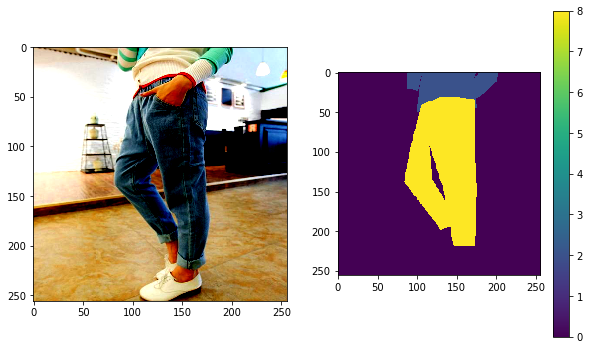

In [4]:
image, mask = train_dataset[118]

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow((image.numpy().transpose((1, 2, 0)) + 1) / 2.)
# plt.axis('off')

plt.subplot(122)
extmask = torch.cat([1. - mask.sum(axis=0, keepdim=True), mask])
plt.imshow(torch.argmax(extmask, axis=0))
# plt.axis('off')
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


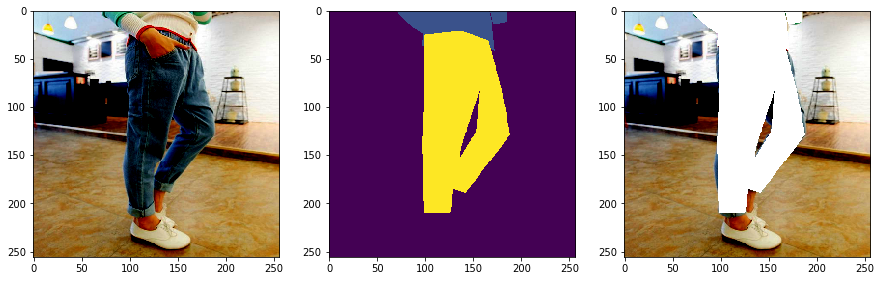

In [7]:
train_dataset_masked = DeepFashion2Dataset('../../data/train',
                                           transform=train_trasform,
                                          return_masked_image=True)

image, mask, masked_image = train_dataset_masked[118]

plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.imshow((image.numpy().transpose((1, 2, 0)) + 1) / 2.)
# plt.axis('off')

plt.subplot(132)
extmask = torch.cat([1. - mask.sum(axis=0, keepdim=True), mask])
plt.imshow(torch.argmax(extmask, axis=0))
# plt.axis('off')

plt.subplot(133)
plt.imshow((masked_image.numpy().transpose((1, 2, 0)) + 1) / 2.)
# plt.axis('off')